# Analisis de Tuberculosis

**Planteamiento**  

Usted trabaja para la Organización Mundial de la Salud como analista de información.  
El consejo directivo se reunirá para revisar los datos más recientes de casos de tuberculosis.  

Los datos han llegado con la información más reciente y necesita prepararlos para mostrar la información a los líderes de la organización.  

El objetivo de la junta es entender la situación actual de tuberculosis, y las tendencias por región e identificar países que han sido casos de éxito y aquellos que necesiten mayor apoyo con la gestión de la enfermedad.  

Tenga en mente las metas de la ONU para terminar con la Tuberculosis para 2025:  

● Reducción en la tasa de incidencia del 50% 2015 vs 2025.  

● Reducción en 75% el número de muertes 2015 vs 2025

[Documentación de los datos de tuberculosis](https://tidyr.tidyverse.org/reference/who.html)

**¿Qué es la tuberculosis?**  
La tuberculosis es una enfermedad infecciosa causada por la bacteria *Mycobacterium tuberculosis*. Afecta principalmente a los pulmones, aunque también puede dañar otro organos del cuerpo, mejor conocido como tuberculosos extrapulmonar.

Se trasmite por vía áerea, a través de gotículas que una persona enferma expulsa al toser, estornudar o hablar.

**Métodos de dignóstico**

1.   ***Smear Positive Pulmonary Tuberculosis (sp)::*** Diagnóstico por baciloscopia pulmonar positiva, es decir, se detectan bacilos de tuberculosis. Método más tradicional y específico para detectar tuberculosis pulmonar activa. Indicador clave de transmisión porque estos pacientes suelen ser más infecciosos.
1.   ***Smear Negative Pulmonary Tuberculosis (sn)::*** Diagnóstico por baciloscopia pulmonar negativa, es decir, no se detectan bacilos. Son casos con síntoma clínicos compatibles peor una baciloscopía negativa, por lo que debe apoyarse en otros métodos. Estos pacientes son difíciles de confirmar.

1.   ***Extrapulmonary Tuberculosis (ep)::*** Diagnóstico de tuberculosis extrapulmonar, esdecir, que afecta otras partes del cuerpo sin afectar directamente los pulmones. Estos pacientes son menos infecciosos, y más difíciles de tratar.

1.   ***Relapse Cases (rel)::*** Diagnóstico de recaída, es decir, paciente que ya habían sido tratados y dados de alta, pero vuelven a desarrollar tuberculosis activa. Estos pacientes son importnates para evaluar la efectividad de los tratamientos y el riesgo de decaídas.

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pop = pd.read_csv('/content/drive/MyDrive/datos/population.csv') # separado por coma (coma separated value)
who = pd.read_csv('/content/drive/MyDrive/datos/who.csv')

In [ ]:
who.head(5)

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sn_m014,new_sn_m1524,new_sn_m2534,new_sn_m3544,new_sn_m4554,new_sn_m5564,new_sn_m65,new_sn_f014,new_sn_f1524,new_sn_f2534,new_sn_f3544,new_sn_f4554,new_sn_f5564,new_sn_f65,new_ep_m014,new_ep_m1524,new_ep_m2534,new_ep_m3544,new_ep_m4554,new_ep_m5564,new_ep_m65,new_ep_f014,new_ep_f1524,new_ep_f2534,new_ep_f3544,new_ep_f4554,new_ep_f5564,new_ep_f65,newrel_m014,newrel_m1524,newrel_m2534,newrel_m3544,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pop.head(5)

,country,year,population
0,Afghanistan,1995,17586073
1,Afghanistan,1996,18415307
2,Afghanistan,1997,19021226
3,Afghanistan,1998,19496836
4,Afghanistan,1999,19987071


# Limpieza y manipulacion de Datos

**Explorar los valores nulos**

In [ ]:
who.isna().sum()

In [ ]:
# Investigar los valores faltantes en la columna iso2
who[who.iso2.isna()]

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sn_m014,new_sn_m1524,new_sn_m2534,new_sn_m3544,new_sn_m4554,new_sn_m5564,new_sn_m65,new_sn_f014,new_sn_f1524,new_sn_f2534,new_sn_f3544,new_sn_f4554,new_sn_f5564,new_sn_f65,new_ep_m014,new_ep_m1524,new_ep_m2534,new_ep_m3544,new_ep_m4554,new_ep_m5564,new_ep_m65,new_ep_f014,new_ep_f1524,new_ep_f2534,new_ep_f3544,new_ep_f4554,new_ep_f5564,new_ep_f65,newrel_m014,newrel_m1524,newrel_m2534,newrel_m3544,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
4369,Namibia,NaN,NAM,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4370,Namibia,NaN,NAM,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4371,Namibia,NaN,NAM,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4372,Namibia,NaN,NAM,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4373,Namibia,NaN,NAM,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4374,Namibia,NaN,NAM,1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4375,Namibia,NaN,NAM,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4376,Namibia,NaN,NAM,1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4377,Namibia,NaN,NAM,1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4378,Namibia,NaN,NAM,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Los valores NA se debe a que el iso2 de Namibia es "NA", y pandas lo tomo como un valor faltante
who.loc[who.country == "Namibia", "iso2"] = "NA"

In [ ]:
# Las demas columnas de casos con valores faltantes se van directo a un valor 0
who.fillna(0, inplace=True)

In [ ]:
# Checar valores faltantes en la tabla de population
pop.isna().sum()

,0
country,0
year,0
population,0


In [ ]:
# Como convertir columnas en filas :: melt()
who2 = who.melt(id_vars=["country", "iso2", "iso3", "year"])
who2.head(10)

,country,iso2,iso3,year,variable,value
0,Afghanistan,AF,AFG,1980,new_sp_m014,0.0
1,Afghanistan,AF,AFG,1981,new_sp_m014,0.0
2,Afghanistan,AF,AFG,1982,new_sp_m014,0.0
3,Afghanistan,AF,AFG,1983,new_sp_m014,0.0
4,Afghanistan,AF,AFG,1984,new_sp_m014,0.0
5,Afghanistan,AF,AFG,1985,new_sp_m014,0.0
6,Afghanistan,AF,AFG,1986,new_sp_m014,0.0
7,Afghanistan,AF,AFG,1987,new_sp_m014,0.0
8,Afghanistan,AF,AFG,1988,new_sp_m014,0.0
9,Afghanistan,AF,AFG,1989,new_sp_m014,0.0


In [ ]:
# Funcion para asignar el genero
def asignar_genero(valor):
  if 'm' in valor:
    return 'masculino'
  else:
    return 'femenino'

In [ ]:
who2["genero"] = who2["variable"].apply(asignar_genero)
who2.head(10)

,country,iso2,iso3,year,variable,value,genero
0,Afghanistan,AF,AFG,1980,new_sp_m014,0.0,masculino
1,Afghanistan,AF,AFG,1981,new_sp_m014,0.0,masculino
2,Afghanistan,AF,AFG,1982,new_sp_m014,0.0,masculino
3,Afghanistan,AF,AFG,1983,new_sp_m014,0.0,masculino
4,Afghanistan,AF,AFG,1984,new_sp_m014,0.0,masculino
5,Afghanistan,AF,AFG,1985,new_sp_m014,0.0,masculino
6,Afghanistan,AF,AFG,1986,new_sp_m014,0.0,masculino
7,Afghanistan,AF,AFG,1987,new_sp_m014,0.0,masculino
8,Afghanistan,AF,AFG,1988,new_sp_m014,0.0,masculino
9,Afghanistan,AF,AFG,1989,new_sp_m014,0.0,masculino


In [ ]:
# Funcion para asignar el metodo
def asignar_metodo(valor):
  if 'sp' in valor:
    return 'smear positive'
  elif 'sn' in valor:
    return 'smear negative'
  elif 'ep' in valor:
    return 'extrapulmonary'
  else:
    return 'relapse'

In [ ]:
who2["metodo"] = who2["variable"].apply(asignar_metodo)
who2.head(50)

,country,iso2,iso3,year,variable,value,genero,metodo
0,Afghanistan,AF,AFG,1980,new_sp_m014,0.0,masculino,smear positive
1,Afghanistan,AF,AFG,1981,new_sp_m014,0.0,masculino,smear positive
2,Afghanistan,AF,AFG,1982,new_sp_m014,0.0,masculino,smear positive
3,Afghanistan,AF,AFG,1983,new_sp_m014,0.0,masculino,smear positive
4,Afghanistan,AF,AFG,1984,new_sp_m014,0.0,masculino,smear positive
5,Afghanistan,AF,AFG,1985,new_sp_m014,0.0,masculino,smear positive
6,Afghanistan,AF,AFG,1986,new_sp_m014,0.0,masculino,smear positive
7,Afghanistan,AF,AFG,1987,new_sp_m014,0.0,masculino,smear positive
8,Afghanistan,AF,AFG,1988,new_sp_m014,0.0,masculino,smear positive
9,Afghanistan,AF,AFG,1989,new_sp_m014,0.0,masculino,smear positive


In [ ]:
# Funcion para asginar la edad
def asignar_grupoedad(valor):
  if '014' in valor:
    return '0-14'
  elif '1524' in valor:
    return '15-24'
  elif '2534' in valor:
    return '25-34'
  elif '3544' in valor:
    return '35-44'
  elif '4554' in valor:
    return '45-54'
  elif '5564' in valor:
    return '55-64'
  else:
    return '65+'

In [ ]:
who2["grupoedad"] = who2["variable"].apply(asignar_grupoedad)
who2.head(10)

,country,iso2,iso3,year,variable,value,genero,metodo,grupoedad
0,Afghanistan,AF,AFG,1980,new_sp_m014,0.0,masculino,smear positive,0-14
1,Afghanistan,AF,AFG,1981,new_sp_m014,0.0,masculino,smear positive,0-14
2,Afghanistan,AF,AFG,1982,new_sp_m014,0.0,masculino,smear positive,0-14
3,Afghanistan,AF,AFG,1983,new_sp_m014,0.0,masculino,smear positive,0-14
4,Afghanistan,AF,AFG,1984,new_sp_m014,0.0,masculino,smear positive,0-14
5,Afghanistan,AF,AFG,1985,new_sp_m014,0.0,masculino,smear positive,0-14
6,Afghanistan,AF,AFG,1986,new_sp_m014,0.0,masculino,smear positive,0-14
7,Afghanistan,AF,AFG,1987,new_sp_m014,0.0,masculino,smear positive,0-14
8,Afghanistan,AF,AFG,1988,new_sp_m014,0.0,masculino,smear positive,0-14
9,Afghanistan,AF,AFG,1989,new_sp_m014,0.0,masculino,smear positive,0-14


In [ ]:
# remover la columna variable que ya no es util
who2.drop(columns=["variable"], inplace=True)

In [ ]:
# renombrar a value por cases
who2.rename(columns={"value":"cases"}, inplace=True)

In [ ]:
who2.head()

,country,iso2,iso3,year,cases,genero,metodo,grupoedad
0,Afghanistan,AF,AFG,1980,0.0,masculino,smear positive,0-14
1,Afghanistan,AF,AFG,1981,0.0,masculino,smear positive,0-14
2,Afghanistan,AF,AFG,1982,0.0,masculino,smear positive,0-14
3,Afghanistan,AF,AFG,1983,0.0,masculino,smear positive,0-14
4,Afghanistan,AF,AFG,1984,0.0,masculino,smear positive,0-14


In [ ]:
# Traer la poblacion
df = pd.merge(who2, pop, on=["country", "year"], how="inner")
df.head(10)

,country,iso2,iso3,year,cases,genero,metodo,grupoedad,population
0,Afghanistan,AF,AFG,1995,0.0,masculino,smear positive,0-14,17586073
1,Afghanistan,AF,AFG,1996,0.0,masculino,smear positive,0-14,18415307
2,Afghanistan,AF,AFG,1997,0.0,masculino,smear positive,0-14,19021226
3,Afghanistan,AF,AFG,1998,30.0,masculino,smear positive,0-14,19496836
4,Afghanistan,AF,AFG,1999,8.0,masculino,smear positive,0-14,19987071
5,Afghanistan,AF,AFG,2000,52.0,masculino,smear positive,0-14,20595360
6,Afghanistan,AF,AFG,2001,129.0,masculino,smear positive,0-14,21347782
7,Afghanistan,AF,AFG,2002,90.0,masculino,smear positive,0-14,22202806
8,Afghanistan,AF,AFG,2003,127.0,masculino,smear positive,0-14,23116142
9,Afghanistan,AF,AFG,2004,139.0,masculino,smear positive,0-14,24018682


In [ ]:
# Guardar la tabla en csv
df.to_csv("/content/drive/MyDrive/datos/tuberculosis.csv")

# Analisis Exploratorio con Python

In [ ]:
# recordemos que df es el dataframe con los datos limpios
df.head(25)

,country,iso2,iso3,year,cases,genero,metodo,grupoedad,population
0,Afghanistan,AF,AFG,1995,0.0,masculino,smear positive,0-14,17586073
1,Afghanistan,AF,AFG,1996,0.0,masculino,smear positive,0-14,18415307
2,Afghanistan,AF,AFG,1997,0.0,masculino,smear positive,0-14,19021226
3,Afghanistan,AF,AFG,1998,30.0,masculino,smear positive,0-14,19496836
4,Afghanistan,AF,AFG,1999,8.0,masculino,smear positive,0-14,19987071
5,Afghanistan,AF,AFG,2000,52.0,masculino,smear positive,0-14,20595360
6,Afghanistan,AF,AFG,2001,129.0,masculino,smear positive,0-14,21347782
7,Afghanistan,AF,AFG,2002,90.0,masculino,smear positive,0-14,22202806
8,Afghanistan,AF,AFG,2003,127.0,masculino,smear positive,0-14,23116142
9,Afghanistan,AF,AFG,2004,139.0,masculino,smear positive,0-14,24018682


In [ ]:
# Agrupar y resumir datos en Python
# Por genero
por_genero = df.groupby("genero", as_index=False)["cases"].sum()
por_genero["porcentaje"] = 100 * por_genero["cases"] / por_genero["cases"].sum()
por_genero.head()

,genero,cases,porcentaje
0,femenino,15818663.0,36.640815
1,masculino,27353584.0,63.359185


In [ ]:
# Por metodo
por_metodo = df.groupby("metodo", as_index=False)["cases"].sum()
por_metodo["porcentaje"] = 100 * por_metodo["cases"] / por_metodo["cases"].sum()
por_metodo.head()

,metodo,cases,porcentaje
0,extrapulmonary,1986179.0,4.600592
1,relapse,3205329.0,7.424513
2,smear negative,6279526.0,14.545284
3,smear positive,31701213.0,73.429611


In [ ]:
# Por edad
por_edad = df.groupby("grupoedad", as_index=False)["cases"].sum()
por_edad["porcentaje"] = 100 * por_edad["cases"] / por_edad["cases"].sum()
por_edad.head()

,grupoedad,cases,porcentaje
0,0-14,1702349.0,3.943156
1,15-24,7594407.0,17.590947
2,25-34,9562886.0,22.150540
3,35-44,8720495.0,20.199308
4,45-54,6475709.0,14.999703


In [ ]:
# Cantidad de Paises Involucrados, Año de inicio y Año de finalizacion de los datos
print(f"Cantidad de Paises: {df.country.nunique()}")
print(f"Año de inicio: {df.year.min()}")
print(f"Año de finalizacion: {df.year.max()}")

Cantidad de Paises: 217
Año de inicio: 1995
Año de finalizacion: 2013


Tasa de incidencia (por cada 100 mil habitantes) =  
100,000 * casos nuevos / poblacion

In [ ]:
# Nueva tabla para calcular la incidencia
country_year = df.groupby(["country", "year"], as_index=False).agg({"cases": "sum", "population": "max"})
country_year["tasa_incidencia"] = 100_000 * country_year["cases"] / country_year["population"]
country_year.head()

,country,year,cases,population,tasa_incidencia
0,Afghanistan,1995,0.0,17586073,0.000000
1,Afghanistan,1996,0.0,18415307,0.000000
2,Afghanistan,1997,128.0,19021226,0.672932
3,Afghanistan,1998,1778.0,19496836,9.119428
4,Afghanistan,1999,745.0,19987071,3.727410


In [ ]:
# Nueva tabla para calcular la incidencia POR AÑO
by_year = country_year.groupby("year", as_index=False).agg(
    {"cases": "sum", "population": "sum"}
    )
by_year["tasa_incidencia"] = 100_000 * by_year["cases"] / by_year["population"]
by_year

,year,cases,population,tasa_incidencia
0,1995,505717.0,5703289735,8.867110
1,1996,628318.0,5781863871,10.867049
2,1997,724163.0,5858936095,12.359974
3,1998,830998.0,5934972576,14.001716
4,1999,986176.0,6010587100,16.407316
5,2000,1148463.0,6086267209,18.869743
6,2001,1227501.0,6162187587,19.919890
7,2002,1512296.0,6239282896,24.238298
8,2003,1849403.0,6315958969,29.281428
9,2004,2172788.0,6393225245,33.985788


In [ ]:
# 1995	tasa de incidencia: 8.867110
# 2010	tasa de incidencia: 57.818956
# tasa de variacion = (tasa_de_incidencia_final - tasa_de_incidencia_inicial) /tasa_de_incidencia_inicial
100 * (57.818956 - 8.867110) /  8.867110

552.0608856775207

In [ ]:
import matplotlib.pyplot as plt # base de visualizacion en Python
import seaborn as sns # visualizaciones mas sencillas hechas encima de Matplotlib
import plotly.express as px # visualizaciones interactivas

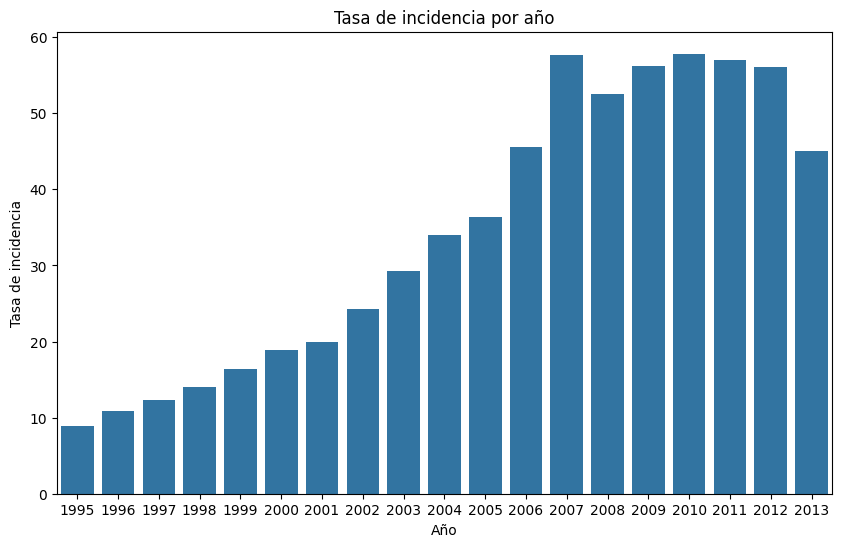

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="year", y="tasa_incidencia", data=by_year)
plt.title("Tasa de incidencia por año")
plt.xlabel("Año")
plt.ylabel("Tasa de incidencia")
plt.savefig("/content/drive/MyDrive/datos/grafica_incidencia.png")

In [ ]:
# grafica de barras con plotly
fig = px.bar(by_year, x="year", y="tasa_incidencia")
fig.show()

In [ ]:
before_df = df[df.year < 2010]

In [ ]:
before_df.head(100)

,country,iso2,iso3,year,cases,genero,metodo,grupoedad,population
0,Afghanistan,AF,AFG,1995,0.0,masculino,smear positive,0-14,17586073
1,Afghanistan,AF,AFG,1996,0.0,masculino,smear positive,0-14,18415307
2,Afghanistan,AF,AFG,1997,0.0,masculino,smear positive,0-14,19021226
3,Afghanistan,AF,AFG,1998,30.0,masculino,smear positive,0-14,19496836
4,Afghanistan,AF,AFG,1999,8.0,masculino,smear positive,0-14,19987071
5,Afghanistan,AF,AFG,2000,52.0,masculino,smear positive,0-14,20595360
6,Afghanistan,AF,AFG,2001,129.0,masculino,smear positive,0-14,21347782
7,Afghanistan,AF,AFG,2002,90.0,masculino,smear positive,0-14,22202806
8,Afghanistan,AF,AFG,2003,127.0,masculino,smear positive,0-14,23116142
9,Afghanistan,AF,AFG,2004,139.0,masculino,smear positive,0-14,24018682
